In [3]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from cxr_analysis import load_results_from_log, get_cxr14_rocs_from_log

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Loading reproduce-chexnet data from file
reproduce_chexnet_results_path = '../analysis_data/reproduce_chexnet_aucs.csv'
reproduce_chexnet_results = pd.read_csv(reproduce_chexnet_results_path, 
                                        index_col='LABEL', names=['LABEL','CHEXNET-ORIG', 'CHEXNET-REPRODUCE'],
                                        header=0)
reproduce_chexnet_results.index = reproduce_chexnet_results.index.str.upper()

In [204]:
def get_cv_index(dd):
    spl = dd.split('_')
    return dd.split('_')[6] # ws 5 for 4/22
# Specify log directory to pull results from
log_base_dir = '/lfs/1/jdunnmon/repos/metal/logs/2019_04_24'
cv_base_name = 'cv_slice_with_roc'
#log_base_dir = '/lfs/1/jdunnmon/repos/metal/logs/2019_04_22'
logs_in_folder = os.listdir(log_base_dir)
#cv_base_name = 'test_cv_baseline'
cv_log_dirs = [nm for nm in logs_in_folder if cv_base_name in nm]
logs_to_load = {f"run_{get_cv_index(x)}":x for x in cv_log_dirs}

df_results_dict = {}
df_results_dict['roc-auc'] = reproduce_chexnet_results.copy()
df_results_dict['f1'] = reproduce_chexnet_results.copy()

for name, log in logs_to_load.items():
    # Loading all json logs
    results = load_results_from_log(os.path.join(log_base_dir,log))
    df_results_dict['roc-auc'] = get_cxr14_rocs_from_log(df_results_dict['roc-auc'], results['metrics'],
                                                         col_name=name, plot_metric='roc-auc', load_slices=False)
    df_results_dict['f1'] = get_cxr14_rocs_from_log(df_results_dict['f1'], results['metrics'], 
                                                    col_name=name, plot_metric='f1', load_slices=False)

In [205]:
df_results_analyze = df_results_dict['roc-auc'].round(3)

In [206]:
# Plotting drain slice performance
# (1) trained w/o slice: main head on main task
# (2) trained w/slice: main head on slice task, slice head on slice task

slice_results_dict = {}
slice_results_dict['roc-auc'] = df_results_dict['roc-auc'].copy()

df_slice = {}
for ky, log in logs_to_load.items():
    results = load_results_from_log(os.path.join(log_base_dir,log))
    if 'slice_metrics' in results.keys():
        slice_metrics = results['slice_metrics']['test']
        for head in slice_metrics:
            slice_results_dict['roc-auc'] = get_cxr14_rocs_from_log(slice_results_dict['roc-auc'], 
                                        slice_metrics[head], col_name=f"{ky}", plot_metric='roc-auc', load_slices=True, head=head)

In [207]:
cv_keys = list(logs_to_load.keys())
slice_results_dict['roc-auc']['cv_mean'] = slice_results_dict['roc-auc'].filter(cv_keys).mean(axis=1)
slice_results_dict['roc-auc']['cv_std'] = slice_results_dict['roc-auc'].filter(cv_keys).std(axis=1)
slice_results_dict['roc-auc'].round(3)

,CHEXNET-ORIG,CHEXNET-REPRODUCE,run_1,run_5,run_2,run_4,run_3,cv_mean,cv_std
LABEL,,,,,,,,,
ATELECTASIS,0.816,0.809,0.808,0.805,0.809,0.806,0.810,0.808,0.002
CARDIOMEGALY,0.910,0.925,0.907,0.894,0.904,0.905,0.905,0.903,0.005
CONSOLIDATION,0.801,0.790,0.802,0.796,0.804,0.803,0.803,0.802,0.003
EDEMA,0.898,0.888,0.882,0.889,0.892,0.887,0.887,0.887,0.003
EFFUSION,0.884,0.864,0.878,0.875,0.880,0.879,0.881,0.878,0.002
EMPHYSEMA,0.923,0.937,0.904,0.899,0.905,0.902,0.908,0.904,0.004
FIBROSIS,0.829,0.805,0.805,0.815,0.808,0.806,0.804,0.808,0.004
HERNIA,0.901,0.916,0.902,0.875,0.895,0.855,0.853,0.876,0.022
INFILTRATION,0.708,0.734,0.704,0.705,0.702,0.703,0.705,0.704,0.001


/lfs/1/jdunnmon/repos/anaconda3/envs/metal/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


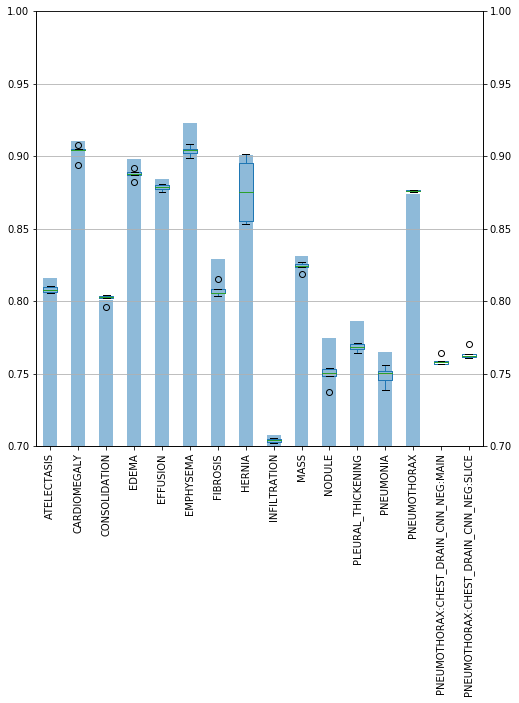

In [213]:
# plotting
#fig,ax = plt.subplots()
#colors = ["blue"]
#for i in [6,7]:
#    y = table1.t_in[table1.duration==i]
    # Add some random "jitter" to the x-axis
#    x = np.random.normal(i, 0.03, size=len(y))
#    ax.scatter(x, y, c=colors[i-6], alpha=0.5)

#ax.boxplot([table1.t_in[table1.duration==6].values,table1.t_in[table1.duration==7].values], positions=[6,7])
#plt.show()

#ax = slice_results_dict['roc-auc'].filter(cv_keys).T.boxplot(figsize=(10,10),rot=90)
#slice_results_dict['roc-auc'].filter(['CHEXNET-ORIG']).plot.bar(figsize=(10,10),rot=90)
#plt.show()
import numpy as np

fig, ax = plt.subplots(1,1,figsize=(8,8))
#ax.boxplot(slice_results_dict['roc-auc'].filter(cv_keys).T.values)
cv = [a[0] for a in slice_results_dict['roc-auc'].filter(['CHEXNET-ORIG']).values.tolist()]
ax.bar(range(1,17), cv, align='center', width=0.5,alpha=0.5)
ax2 = ax.twinx()
ax2 = slice_results_dict['roc-auc'].filter(cv_keys).T.boxplot(figsize=(10,10),rot=90)
#slice_results_dict['roc-auc'].filter(['CHEXNET-ORIG']).plot.bar(figsize=(10,10),rot=90, ax=ax)
ax.set_ylim([0.7,1])
ax2.set_ylim(ax.get_ylim())
ax.set_xticklabels(slice_results_dict['roc-auc'].index, rotation='vertical')
plt.show()
#ax.bar(np.array(range(15)), slice_results_dict['roc-auc'].filter(['CHEXNET-ORIG']).values, color='blue', align='center')
#ax2 = ax.twinx()
#slice_results_dict['roc-auc'].filter(['CHEXNET-ORIG']).plot.bar(figsize=(10,10),rot=90)
#ax.boxplot(slice_results_dict['roc-auc'].filter(cv_keys).T.values, ax=ax)
#ax2.set_ylim(ax.get_ylim())
#x.set_xticklabels(slice_results_dict['roc-auc'].index, rotation='vertical')


In [ ]:
import matplotlib.pyplot as plt
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
#ax = df_compare.plot.bar(rot=45)
save_res = False
models_to_plot = ['CHEXNET-ORIG','MTL-224','MTL-512']
#models_to_plot = ['MTL-224','MTL-224-NO-DRAIN-BASE','MTL-224-NO-DRAIN-HPS']
plot_metric = 'roc-auc'
df_plot = df_results_dict[plot_metric][models_to_plot]
f = plt.figure('ROC-AUC')
plt.title('CXR-14 Performance', color='black')
plt.ylabel(f'Test {plot_metric.upper()}')
plot = df_plot.plot(kind='bar', ax=f.gca(),rot=90)
plot.set_xlabel('')
if plot_metric == 'roc-auc':
    plot.set_ylim([0.7, 1.0])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
if save_res:
    plt.savefig(f'../figures/CXR14-performance-{plot_metric}-mtl-chexnet-224-drain.png',format='png', bbox_inches='tight')
plt.show()

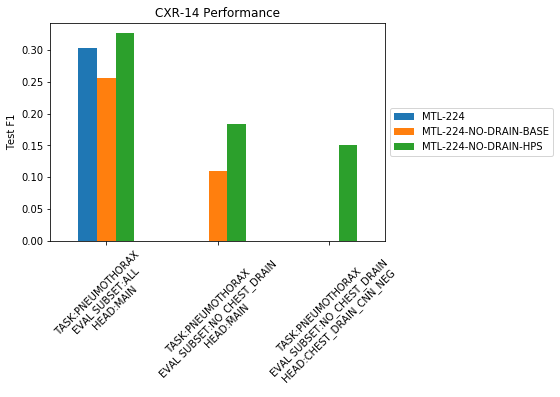

In [88]:
import matplotlib.pyplot as plt

def convert_slice_plot_names(df, slc_name):
    inds = df.index.tolist()
    for ii, ind in enumerate(inds):
        if ":" in ind:
            splt = ind.split(":")
            slc = slc_name
        else:
            splt = ind
            slc = 'ALL'
        if isinstance(splt, str):
            task, head = ind, 'MAIN'
        else:
            task, sh, head = splt
            if head == 'SLICE':
                head = sh
        inds[ii] = f'TASK:{task} \n EVAL SUBSET:{slc} \n HEAD:{head}'
    df.index = inds
    
# Save if True
save_res = True

# Getting models and tasks to plot
models_to_plot = ['MTL-224','MTL-224-NO-DRAIN-BASE','MTL-224-NO-DRAIN-HPS']
tasks_to_plot = ['PNEUMOTHORAX']
plot_metric = 'f1'
# Getting indices for all relevant slices
df_indices = [a for a in slice_results_dict[plot_metric].index if any([t in a for t in tasks_to_plot])]
# Selecting
df_plot = slice_results_dict[plot_metric][models_to_plot].loc[df_indices].copy()
# Converting names
convert_slice_plot_names(df_plot,'NO_CHEST_DRAIN')

f = plt.figure('DRAIN_SLICE')
plt.title('CXR-14 Performance', color='black')
plt.ylabel(f'Test {plot_metric.upper()}')
plot = df_plot.plot(kind='bar', ax=f.gca(),rot=45)
plot.set_xlabel('')
if plot_metric == 'roc-auc':
    plot.set_ylim([0.7, 1.0])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
if save_res:
    plt.savefig(f'../figures/CXR14-performance-{plot_metric}-mtl-chexnet-224-pneumo-drain.png',format='png', bbox_inches='tight')
plt.show()

In [81]:
inds = df_plot.index.tolist()
for ii, ind in enumerate(inds):
    if ":" in ind:
        splt = ind.split(":")
    else:
        splt = ind
    if isinstance(splt, str):
        task, slc,head = ind, 'ALL', 'MAIN'
    else:
        task, slc, head = splt
    inds[ii] = f'TASK:{task} \n SLICE:{slc} \n HEAD:{head}'

ValueError: too many values to unpack (expected 3)

# SANDBOX